## Team ID = PTID-CDS-JAN 22 -1273A
### Project ID = PRCP-1002-HandwrittenDigits
#### Problem Statement = Handwritten Image Processing

In [1]:
import numpy as np
import pandas as pd 
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Conv2D,MaxPooling2D,Flatten
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-1-6f51e5110556>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data('Handwritten Digits Image Processing Dataset')

In [3]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
len(X_train)

60000

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
len(X_test)

10000

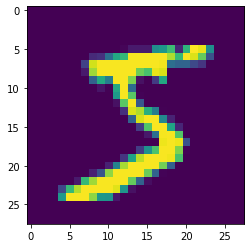

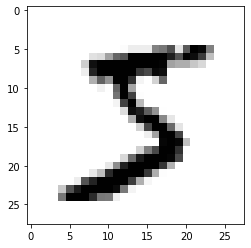

In [7]:
## Viewing the data
plt.imshow(X_train[0])
plt.show()
## The pixel converted into binary
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

### Checking the values of each pixels

## Before Normalization

In [8]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

#####  The images are in Gray level(The range between (0-255))

## Normalizing the Data

* we must scalling the dataset for better performance and better working. In the normalization all the values are divided by 255.

In [9]:
## we might observe from above information the values range between 0-255
## in order to normalize the date
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)

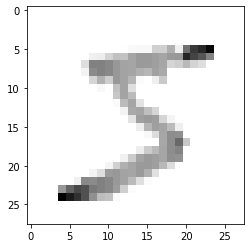

In [10]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

### After Normalization

In [11]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Here we may observe all the values are divided by 255

In [12]:
print(y_train[0]) ## We check the label inside our network

5


## Resize the image for suitable convolution operation


In [13]:
image_size=28
X_trainr=np.array(X_train).reshape(-1,image_size,image_size,1)
X_testr=np.array(X_test).reshape(-1,image_size,image_size,1)
print('Training Sample Dimention',X_trainr.shape)
print('Testing Sample Dimension',X_testr.shape)

Training Sample Dimention (60000, 28, 28, 1)
Testing Sample Dimension (10000, 28, 28, 1)


## Creating Deep Neural Network

* Training on 60000 samples of MNIST of Hand Written Dateset

In [14]:
### Creating a neural network
model=Sequential()
#### First Convolutional Layer
model.add(Conv2D(64,(3,3),input_shape=X_trainr.shape[1:]))## Only for first convolutional layer add input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Second Convolutional Layer
model.add(Conv2D(64,(3,3),input_shape=X_trainr.shape[1:]))## Only for first convolutional layer add input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Third Convolutional Layer
model.add(Conv2D(64,(3,3),input_shape=X_trainr.shape[1:]))## Only for first convolutional layer add input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


## Fully connected layer--1
model.add(Flatten()) ## before adding fullay connected layer we decrease the dimension
model.add(Dense(64))
model.add(Activation('relu'))

## Fully connected layer--2
model.add(Dense(32))
model.add(Activation('relu'))

## Last Fully connected layer ,must be equal to no of classes
model.add(Dense(10)) ## Dense layer must be 10
model.add(Activation('softmax'))


#### In last fullay connected layer we have to use softmax activation function because it is multiclass classification function.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [16]:
print('total training samples',len(X_trainr))

total training samples 60000


In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [18]:
model_history=model.fit(X_trainr,y_train,epochs=5,validation_split=0.30)## Training my model

Epoch 1/5
1313/1313 [==============================] - 50s 37ms/step - loss: 0.3421 - accuracy: 0.8922 - val_loss: 0.1478 - val_accuracy: 0.9559
Epoch 2/5
1313/1313 [==============================] - 47s 36ms/step - loss: 0.1088 - accuracy: 0.9666 - val_loss: 0.1052 - val_accuracy: 0.9689
Epoch 3/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0789 - accuracy: 0.9760 - val_loss: 0.0844 - val_accuracy: 0.9741
Epoch 4/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0624 - accuracy: 0.9813 - val_loss: 0.0674 - val_accuracy: 0.9801
Epoch 5/5
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0500 - accuracy: 0.9844 - val_loss: 0.0581 - val_accuracy: 0.9827


In [19]:
### Evaluating on testing dataset MNIST
model_loss,model_acc=model.evaluate(X_testr,y_test)
print('The loss of 10000 test Samples',model_loss)
print('The accuracy of 10000 test samples',model_acc)


313/313 [==============================] - 3s 9ms/step - loss: 0.0543 - accuracy: 0.9835
The loss of 10000 test Samples 0.05433899536728859
The accuracy of 10000 test samples 0.9835000038146973


In [20]:
predictions=model.predict([X_testr])

In [21]:
predictions ## Actually these predictions based on one hot encoding 

array([[9.2562250e-06, 8.8625329e-06, 3.3230364e-05, ..., 9.9983072e-01,
        5.4730027e-08, 2.3502564e-05],
       [3.3827077e-05, 1.5336739e-04, 9.9980980e-01, ..., 1.6644253e-06,
        8.7289067e-07, 3.2851080e-09],
       [1.1339489e-06, 9.9991572e-01, 4.8530965e-06, ..., 1.4060818e-05,
        4.4397987e-07, 4.2067595e-06],
       ...,
       [9.8215713e-10, 5.0092427e-07, 8.2656921e-09, ..., 1.2786799e-05,
        1.2112586e-06, 6.1102055e-06],
       [1.8473868e-07, 7.0631515e-08, 4.9938413e-09, ..., 2.1742087e-08,
        4.2822438e-05, 1.3608688e-05],
       [6.3732250e-06, 5.3244622e-07, 2.0070780e-07, ..., 1.0127158e-08,
        4.0998962e-06, 2.4489559e-06]], dtype=float32)

In [22]:
print(np.argmax(predictions[5])) ## Argmax will return maximum value of index and find value of it.

1


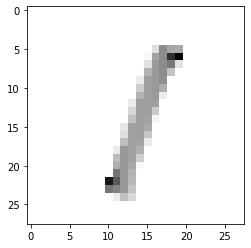

In [23]:
plt.imshow(X_testr[5],cmap=plt.cm.binary)

In [24]:
## List all the data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


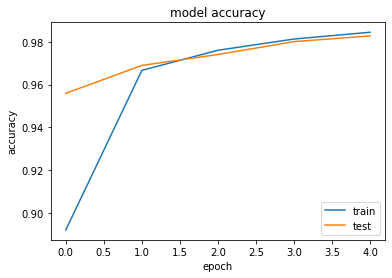

In [25]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='lower right')
plt.show()

#### A plot of accuracy on the training and validation datasets over training epochs.
* From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets after first epoch.

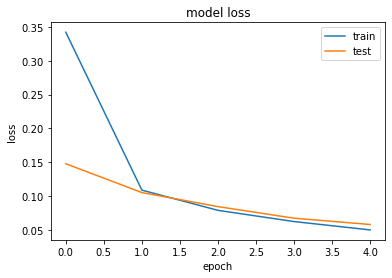

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

#### A plot of loss on the training and validation datasets over training epochs
* From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart  consistently after first epoch, it might be a sign to stop training at an earlier epoch.

In [33]:
model_loss,model_acc=model.evaluate(X_testr,y_test)
print('The loss of 10000 test Samples',model_loss)
print('The accuracy of 10000 test samples',model_acc)


313/313 [==============================] - 3s 8ms/step - loss: 0.0543 - accuracy: 0.9835
The loss of 10000 test Samples 0.05433899536728859
The accuracy of 10000 test samples 0.9835000038146973


## Conclusion

1. From MNIST Handwritten digits dataset we can conclude various points
2. First we have done scalling to this dataset for better accuracy.
3. I have constructed a deep neural network with various activation functions and maxpooling techniques.
4. I got a good accuracy ofter traing the model with five epochs.
5. So we can easily predict the handwritten digits based on this model.
6. Finally I explore the plots with respect to accuracy--validation accuracy and loss--validation loss. From the plot of accuracy I can conclude that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. I can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets after first epoch. From the plot of loss I can say that the model has comparable performance on both train and validation datasets.